# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.  
2.  
3.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ units

In [4]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': 73.0833, 'lat': -0.6}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.17, 'feels_like': 87.93, 'temp_min': 83.17, 'temp_max': 83.17, 'pressure': 1008, 'humidity': 67, 'sea_level': 1008, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 6.29, 'deg': 204, 'gust': 6.46}, 'clouds': {'all': 78}, 'dt': 1650138314, 'sys': {'country': 'MV', 'sunrise': 1650157449, 'sunset': 1650201002}, 'timezone': 18000, 'id': 1282256, 'name': 'Hithadhoo', 'cod': 200}.


In [5]:
weather_json

{'coord': {'lon': 73.0833, 'lat': -0.6},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 83.17,
  'feels_like': 87.93,
  'temp_min': 83.17,
  'temp_max': 83.17,
  'pressure': 1008,
  'humidity': 67,
  'sea_level': 1008,
  'grnd_level': 1007},
 'visibility': 10000,
 'wind': {'speed': 6.29, 'deg': 204, 'gust': 6.46},
 'clouds': {'all': 78},
 'dt': 1650138314,
 'sys': {'country': 'MV', 'sunrise': 1650157449, 'sunset': 1650201002},
 'timezone': 18000,
 'id': 1282256,
 'name': 'Hithadhoo',
 'cod': 200}

In [16]:
# Set Up Lists 
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []


processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f".........................")


for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units="+ units
        response = requests.get(query_url).json() 
        time.sleep(1)
        city_name.append(city)
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
  
        print(f"Processing Record {processing_record} | {city}")
        
        
        processing_record += 1
        
    except:
        print("City not found") 
    continue


print(f"Data Retrieval Complete")


Beginning Data Retrieval
.........................
Processing Record 1 | punta arenas
Processing Record 2 | vaini
Processing Record 3 | morlaix
Processing Record 4 | hobart
Processing Record 5 | iqaluit
City not found
Processing Record 6 | rikitea
Processing Record 7 | saint-augustin
Processing Record 8 | taltal
Processing Record 9 | tuktoyaktuk
City not found
Processing Record 10 | nikolskoye
Processing Record 11 | east london
Processing Record 12 | cape town
Processing Record 13 | marabba
City not found
Processing Record 14 | butaritari
Processing Record 15 | merauke
Processing Record 16 | bredasdorp
Processing Record 17 | tarko-sale
Processing Record 18 | barrow
Processing Record 19 | meadow lake
City not found
Processing Record 20 | klaksvik
Processing Record 21 | blackwater
City not found
Processing Record 22 | belluno
Processing Record 23 | tuatapere
Processing Record 24 | new norfolk
Processing Record 25 | arraial do cabo
Processing Record 26 | sakaiminato
Processing Record 27 |

Processing Record 236 | charters towers
Processing Record 237 | moron
Processing Record 238 | matamoros
Processing Record 239 | beyneu
Processing Record 240 | maceio
Processing Record 241 | chimbote
Processing Record 242 | esperance
Processing Record 243 | marystown
Processing Record 244 | dire
Processing Record 245 | safaga
Processing Record 246 | huarmey
Processing Record 247 | nouakchott
Processing Record 248 | tilichiki
Processing Record 249 | lagoa
Processing Record 250 | alice springs
City not found
Processing Record 251 | starodub
Processing Record 252 | jiujiang
Processing Record 253 | buala
City not found
City not found
Processing Record 254 | lebu
Processing Record 255 | pombas
City not found
Processing Record 256 | tasiilaq
Processing Record 257 | guasdualito
Processing Record 258 | hobyo
Processing Record 259 | flinders
Processing Record 260 | victoria point
Processing Record 261 | norman wells
Processing Record 262 | dakoro
Processing Record 263 | bakreswar
Processing Reco

Processing Record 475 | axim
Processing Record 476 | belle fourche
Processing Record 477 | zemio
Processing Record 478 | saint-francois
Processing Record 479 | aykhal
Processing Record 480 | lethem
City not found
Processing Record 481 | yima
Processing Record 482 | starkville
Processing Record 483 | sao joao da barra
Processing Record 484 | shingu
Processing Record 485 | labuhan
City not found
Processing Record 486 | lincoln
Processing Record 487 | bijawar
Processing Record 488 | domoni
Processing Record 489 | oranjemund
Processing Record 490 | wajir
Processing Record 491 | watsa
Processing Record 492 | monte alegre
Processing Record 493 | blagoyevo
Processing Record 494 | suhum
Processing Record 495 | anadyr
Processing Record 496 | hammerfest
Processing Record 497 | fare
Processing Record 498 | conceicao do araguaia
Processing Record 499 | linxia
Processing Record 500 | havelock
Processing Record 501 | ilula
Processing Record 502 | trelew
Processing Record 503 | sayyan
Processing Reco

In [17]:
#print(count)
print(len(city_name))
print(len(country))   
print(len(date))         
print(len(humidity))   
print(len(latitude))    
print(len(longitude))       
print(len(max_temperature))
print(len(cloudiness))
print(len(wind_speed))

637
584
584
584
584
584
584
584
584


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_city = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Lat": latitude,
    "Lon": longitude,
    "Max Temp": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_df = pd.DataFrame.from_dict(weather_city, orient='index')
weather_df.transpose()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,1650139532,-53.15,-70.9167,48.11,76,40,11.5
1,vaini,TO,1650139319,-21.2,-175.2,81.54,69,92,10.85
2,morlaix,FR,1650139535,48.5833,-4,61.12,65,0,8.05
3,hobart,AU,1650139536,-42.8794,147.3294,57.25,89,100,1.14
4,iqaluit,CA,1650139376,63.7506,-68.5145,9.7,78,100,3
...,...,...,...,...,...,...,...,...,...
632,tadine,None,None,None,None,None,None,None,None
633,rosario,None,None,None,None,None,None,None,None
634,vestmannaeyjar,None,None,None,None,None,None,None,None
635,chicama,None,None,None,None,None,None,None,None


In [19]:
# Export & Save Data Into a .csv.
weather_df.to_csv("C:/Users/User/Desktop/python-API-challenge/WeatherPy/weather_df.csv", index = False, header = True)
weather_df.transpose()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,1650139532,-53.15,-70.9167,48.11,76,40,11.5
1,vaini,TO,1650139319,-21.2,-175.2,81.54,69,92,10.85
2,morlaix,FR,1650139535,48.5833,-4,61.12,65,0,8.05
3,hobart,AU,1650139536,-42.8794,147.3294,57.25,89,100,1.14
4,iqaluit,CA,1650139376,63.7506,-68.5145,9.7,78,100,3
...,...,...,...,...,...,...,...,...,...
632,tadine,None,None,None,None,None,None,None,None
633,rosario,None,None,None,None,None,None,None,None
634,vestmannaeyjar,None,None,None,None,None,None,None,None
635,chicama,None,None,None,None,None,None,None,None


In [10]:
weather_df.head().transpose()

,City,Country,Date,Lat,Lon
0,punta arenas,CL,1650138079,-53.15,-70.9167
1,vaini,TO,1650138342,-21.2,-175.2
2,morlaix,FR,1650138343,48.5833,-4
3,hobart,AU,1650138344,-42.8794,147.3294
4,iqaluit,CA,1650138346,63.7506,-68.5145
...,...,...,...,...,...
632,tadine,None,None,None,None
633,rosario,None,None,None,None
634,vestmannaeyjar,None,None,None,None
635,chicama,None,None,None,None


In [20]:
df_test=weather_df.transpose()
df_test.head()

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,1650139532,-53.15,-70.9167,48.11,76,40,11.5
1,vaini,TO,1650139319,-21.2,-175.2,81.54,69,92,10.85
2,morlaix,FR,1650139535,48.5833,-4,61.12,65,0,8.05
3,hobart,AU,1650139536,-42.8794,147.3294,57.25,89,100,1.14
4,iqaluit,CA,1650139376,63.7506,-68.5145,9.7,78,100,3


In [37]:
df_test.to_csv("C:/Users/User/Desktop/python-API-challenge/WeatherPy/df_test.csv", index = False, header = True)
df_test

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,1650139532,-53.15,-70.9167,48.11,76,40,11.5
1,vaini,TO,1650139319,-21.2,-175.2,81.54,69,92,10.85
2,morlaix,FR,1650139535,48.5833,-4,61.12,65,0,8.05
3,hobart,AU,1650139536,-42.8794,147.3294,57.25,89,100,1.14
4,iqaluit,CA,1650139376,63.7506,-68.5145,9.7,78,100,3
...,...,...,...,...,...,...,...,...,...
632,tadine,None,None,None,None,None,None,None,None
633,rosario,None,None,None,None,None,None,None,None
634,vestmannaeyjar,None,None,None,None,None,None,None,None
635,chicama,None,None,None,None,None,None,None,None


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [38]:
#HumidityDF = df_test[(df_test['Humidity'] > 100)]
#HumidityDF
maxhumidity = df_test.loc[df_test["Humidity"] >= 100].index

In [39]:
humidity_df = df_test.loc[df_test["Humidity"] < 100]
humidity_df

,City,Country,Date,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed
0,punta arenas,CL,1650139532,-53.15,-70.9167,48.11,76,40,11.5
1,vaini,TO,1650139319,-21.2,-175.2,81.54,69,92,10.85
2,morlaix,FR,1650139535,48.5833,-4,61.12,65,0,8.05
3,hobart,AU,1650139536,-42.8794,147.3294,57.25,89,100,1.14
4,iqaluit,CA,1650139376,63.7506,-68.5145,9.7,78,100,3
...,...,...,...,...,...,...,...,...,...
579,bako,NC,1650140392,-21.55,167.8833,76.95,81,0,5.93
580,cuamba,AR,1650140344,-32.9468,-60.6393,78.94,40,0,9.22
581,bayir,IS,1650140344,63.4427,-20.2734,46.98,94,99,18.43
582,yarada,PE,1650140238,-7.8447,-79.1469,64.94,63,65,10.96


In [23]:
len(humidity_df)

573

In [24]:
len(df_test)

637

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [25]:
clean_city_data = df_test.drop(maxhumidity, inplace = False) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

In [1]:
plt.scatter(df_test["Lat"], df_test["Max Temp"], facecolors="red", marker="o", edgecolor="black")
plt.title("City Latitude vs. Maximum Temperature")
plt.ylabel("Maximum Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()

NameError: name 'plt' is not defined

## Latitude vs. Humidity Plot

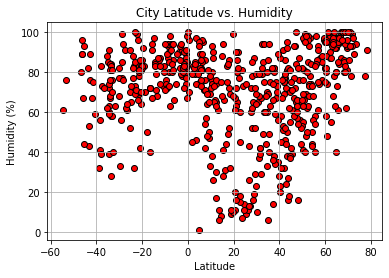

In [27]:
plt.scatter(df_test["Lat"], df_test["Humidity"],facecolors="red", marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

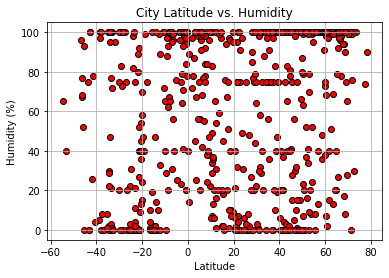

In [28]:
plt.scatter(df_test["Lat"], df_test["Cloudiness"],facecolors="red", marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

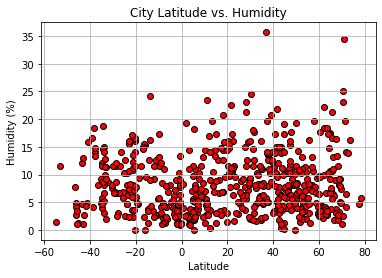

In [29]:
plt.scatter(df_test["Lat"], df_test["Wind Speed"],facecolors="red", marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/Wind Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [30]:
Northern_Hemisphere = df_test.loc[df_test['Lat'] > 0] 
Southern_Hemisphere = df_test.loc[df_test['Lat'] < 0] 

The r-squared is: 0.7745723053932665


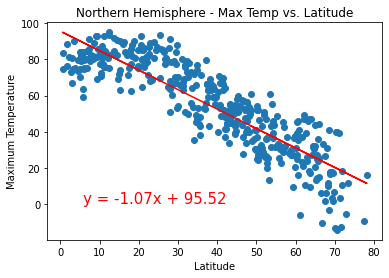

In [31]:
#Northern Hempsphere-max temp vs Latitude Linear Regression


x_values = Northern_Hemisphere['Lat'].astype('float')
y_values = Northern_Hemisphere['Max Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/northernH_temp_lat.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5602021918263369


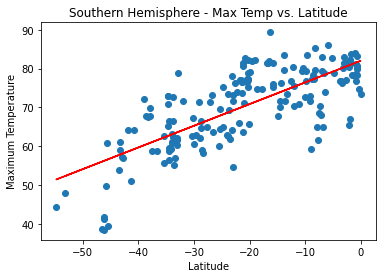

In [32]:
x_values = Southern_Hemisphere['Lat'].astype('float')
y_values = Southern_Hemisphere['Max Temp'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/southernH_temp_lat.png")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08916276883814984


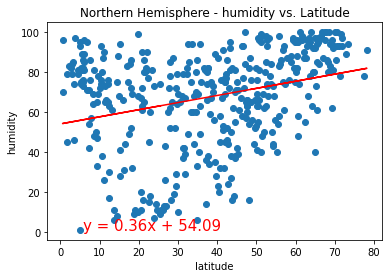

In [33]:
x_values = Northern_Hemisphere['Lat'].astype('float')
y_values = Northern_Hemisphere['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('humidity')
plt.title('Northern Hemisphere - humidity vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/northernH_humid_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14551416647248572


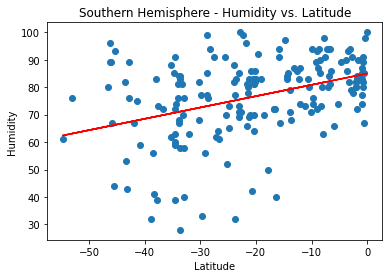

In [36]:
x_values = Southern_Hemisphere['Lat'].astype('float')
y_values = Southern_Hemisphere['Humidity'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/southernH_humid_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.015526581567109706


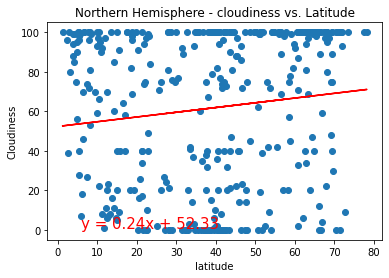

In [44]:
x_values = Northern_Hemisphere['Lat'].astype('float')
y_values = Northern_Hemisphere['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - cloudiness vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/northernH_cloud_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [1]:
x_values = Southern_Hemisphere['Lat'].astype('float')
y_values = Southern_Hemisphere['Cloudiness'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/southernH_cloud_lat.png")
plt.show()

NameError: name 'Southern_Hemisphere' is not defined

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.006328818261545433


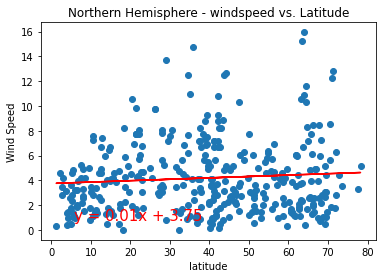

In [36]:
x_values = Northern_Hemisphere['Lat'].astype('float')
y_values = Northern_Hemisphere['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - windspeed vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/northernH_windspeed_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.13793434278710023


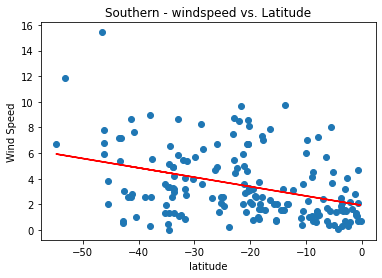

In [45]:
x_values = Southern_Hemisphere['Lat'].astype('float')
y_values = Southern_Hemisphere['Wind Speed'].astype('float')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('latitude')
plt.ylabel('Wind Speed')
plt.title('Southern - windspeed vs. Latitude')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("C:/Users/User/Desktop/python-API-challenge/WeatherPy/SouthernH_windspeed_lat.png")
plt.show()